# NAME:MUNEEB-UL-HASSAN
# Assignment no 02

In [137]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# load data

In [138]:
data=tf.keras.utils.image_dataset_from_directory(r'C:\Users\PMLS\OneDrive\Desktop\facial emotion\data')

Found 2964 files belonging to 2 classes.


In [139]:
data_iterator = data.as_numpy_iterator()

In [140]:
batch = data_iterator.next()

In [141]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [142]:
# labels
batch[1]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0])

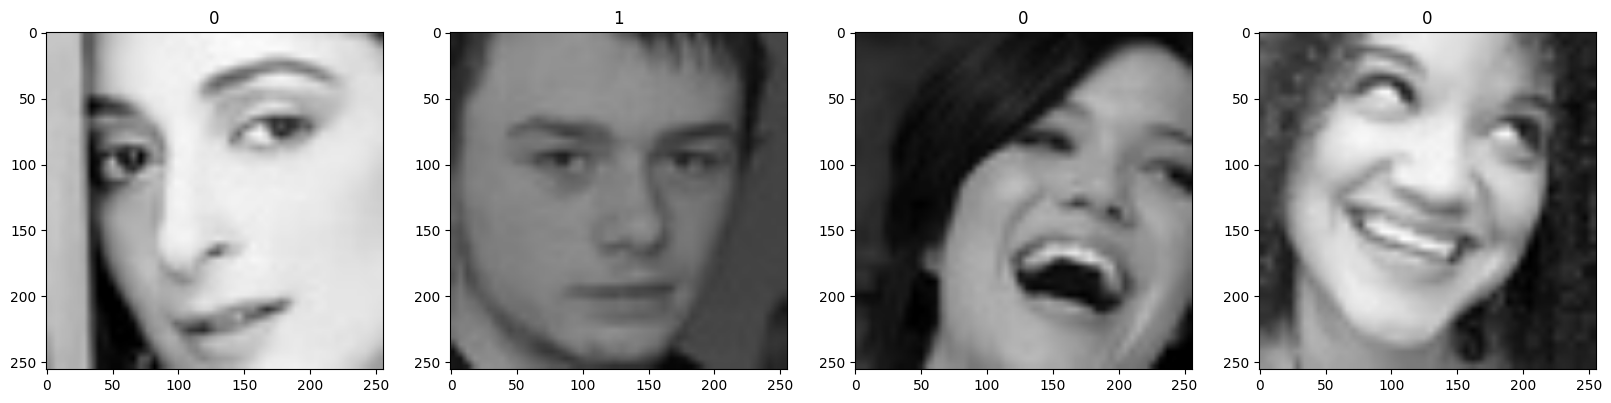

In [143]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# scale data

In [144]:

data = data.map(lambda x,y: (x/255, y)) # x show images and y show label

In [145]:
scaled_iterator = data.as_numpy_iterator()

In [146]:
batch=scaled_iterator.next()

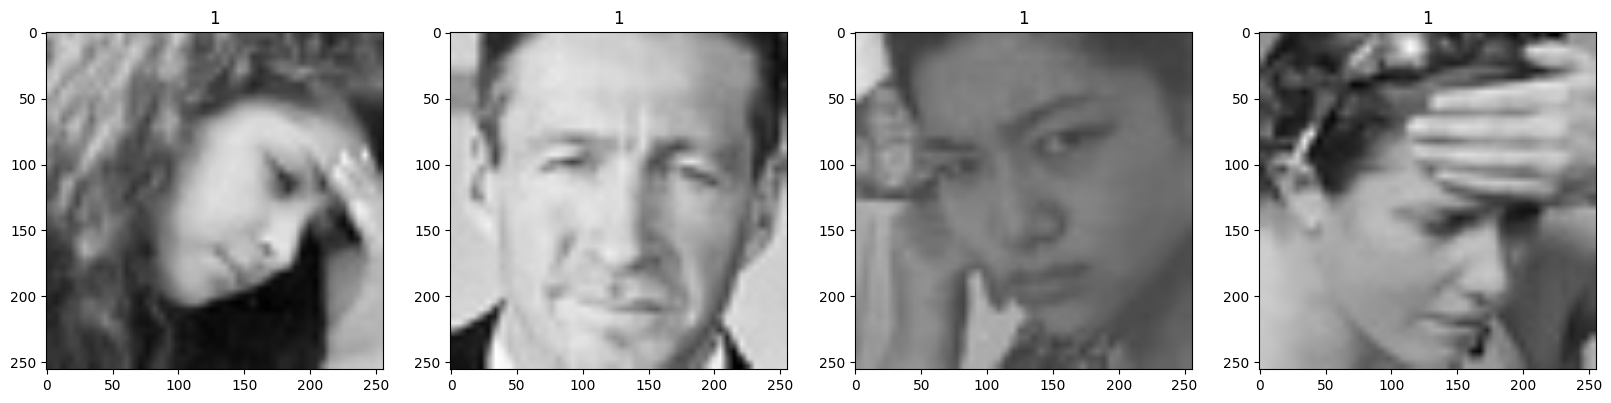

In [147]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# split data


In [148]:
len(data)

93

In [149]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [150]:
train_size

65

In [151]:
val_size

19

In [152]:
test_size

9

In [153]:
train_size+val_size+test_size

93

In [154]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [155]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [157]:
model = Sequential()

In [158]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [159]:
# tf.optimizers. # to check optimzers

In [160]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [161]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

 # Training

In [162]:
logdir='logs'

In [163]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [164]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x00000287566547C0>
Traceback (most recent call last):
  File "c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\weakref.py", line 370, in remove
    self = selfref()
           ^^^^^^^^^
KeyboardInterrupt: 


65/65 ━━━━━━━━━━━━━━━━━━━━ 34s 452ms/step - accuracy: 0.6072 - loss: 0.6716 - val_accuracy: 0.6184 - val_loss: 0.6594
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 426ms/step - accuracy: 0.6328 - loss: 0.6369 - val_accuracy: 0.6612 - val_loss: 0.5907
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 27s 416ms/step - accuracy: 0.7105 - loss: 0.5559 - val_accuracy: 0.6990 - val_loss: 0.5754
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 419ms/step - accuracy: 0.7518 - loss: 0.5031 - val_accuracy: 0.6990 - val_loss: 0.5978
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 423ms/step - accuracy: 0.7696 - loss: 0.4775 - val_accuracy: 0.7155 - val_loss: 0.5569
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 27s 409ms/step - accuracy: 0.8050 - loss: 0.4152 - val_accuracy: 0.7072 - val_loss: 0.6270
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 30s 454ms/step - accuracy: 0.8152 - loss: 0.4111 - val_accuracy: 0.7204 - val_loss: 0.6256
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 28s 423ms/step - accuracy: 0.8749 - loss: 0.2966 - val_accuracy: 0.741

# Plot Performance

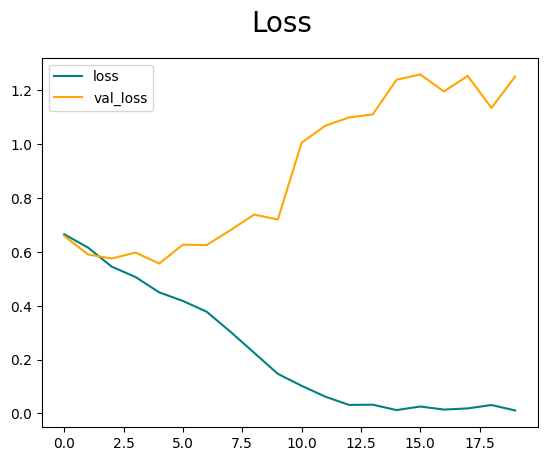

In [180]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

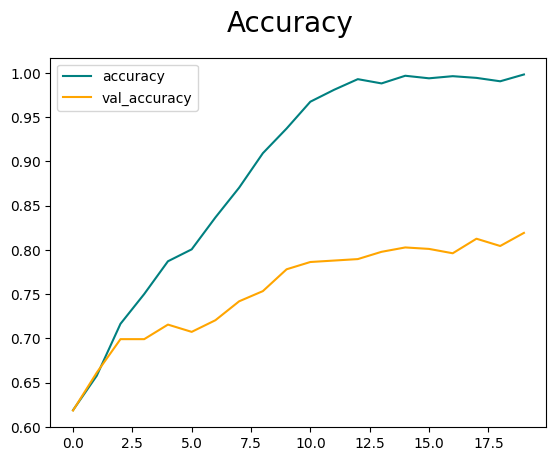

In [181]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [179]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [182]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [183]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [184]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.66964287, shape=(), dtype=float32) tf.Tensor(0.66964287, shape=(), dtype=float32) tf.Tensor(0.73188406, shape=(), dtype=float32)


# Test

In [185]:
import cv2

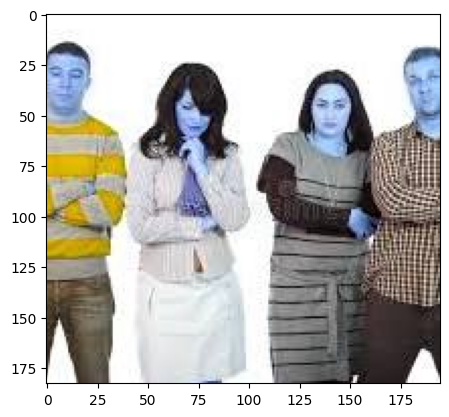

In [192]:
img = cv2.imread(r'C:\Users\PMLS\Downloads\sadpep.jpg')
plt.imshow(img)
plt.show()

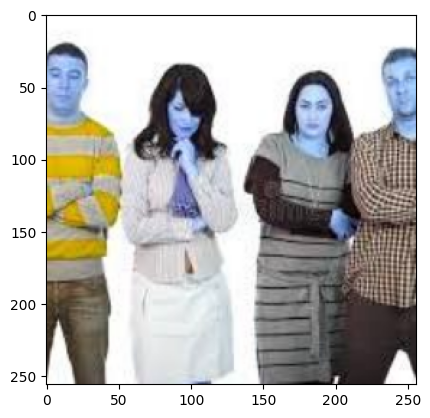

In [193]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [194]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [195]:
yhat

array([[1.]], dtype=float32)

In [198]:
if yhat < 0.5: 
    print(f'Predicted class is happy')
else:
    print(f'Predicted class is sad')

Predicted class is sad


# Save the Model

In [199]:
from tensorflow.keras.models import load_model

In [200]:
model.save(os.path.join('models','imageclassifier.h5'))